In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset

In [2]:
glmt = xr.open_dataset("/work/mh0033/m300883/Tel_MMLE/data/CanESM2/zg/zg_Amon_CanESM2_historical_rcp85_r1i1p1_195001-210012.nc")

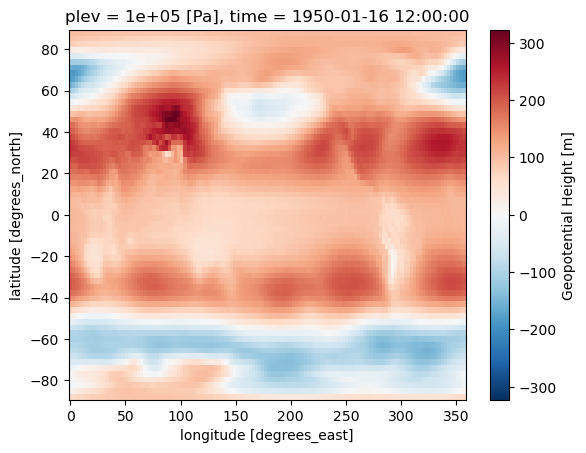

In [3]:
glmt.zg.isel(time = 0, plev = 0).plot()

In [72]:
def return_year(xarr):

    start = xarr.time.values + DateOffset(years = -4)
    end = xarr.time.values + DateOffset(years = 5)
    return slice(str(start.year),str(end.year))

def degree_year(fldmean:xr.DataArray):
    """
    to calculate the year when the mean global surface temperature reaches 1,2,and 4 degrees.
    **Argument**
        *fldmean* the fldmean of tsurf
    """
    if isinstance(fldmean,xr.DataArray):
        pass
    else:
        print("only DataArray is accapted, DataSet recevied")

    try:
        fldmean.lon.size == 1 & fldmean.lat.size == 1
    except ValueError:
        print("the fldmean temperature should be calculated first")

    # ens mean
    if fldmean.ens.size != 1:
        fld_ens_mean = fldmean.mean(dim = 'ens')
    else:
        fld_ens_mean = fldmean

    # squeeze
    mean = fld_ens_mean.squeeze()

    # anomaly
    anomaly = mean-mean[0]

    years = []

    # 0 degree (1855)
    years.append(return_year(anomaly[5]))

    # 2 degree
    years.append(return_year(anomaly.where(anomaly>=2,drop=True)).squeeze()[0])

    # 4 degree
    years.append(return_year(anomaly.where(anomaly>=4,drop=True)).squeeze()[0])

    return years




    

In [74]:
return_year(glmt.tsurf[0])

slice('1846', '1855', None)

In [75]:
glmt.sel(time = return_year(glmt.tsurf[5]))

<xarray.Dataset>
Dimensions:    (time: 10, bnds: 2, lon: 1, lat: 1, ens: 100)
Coordinates:
  * time       (time) datetime64[ns] 1851-07-16T11:52:00 ... 1860-07-16T11:52:00
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tsurf      (time, ens, lat, lon) float32 287.6 287.6 287.5 ... 287.9 287.8
Attributes:
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    Conventions:               CF-1.6
    source:                    ECHAM6
    institution:               Max-Planck-Institute for Meteorology
    history:                   Wed Jan 04 16:59:37 2023: cdo -r -yearmean -fl...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [76]:
glmt

<xarray.Dataset>
Dimensions:    (time: 150, bnds: 2, lon: 1, lat: 1, ens: 100)
Coordinates:
  * time       (time) datetime64[ns] 1850-07-16T11:52:00 ... 1999-07-16T11:52:00
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tsurf      (time, ens, lat, lon) float32 287.7 287.5 287.5 ... 291.8 292.1
Attributes:
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    Conventions:               CF-1.6
    source:                    ECHAM6
    institution:               Max-Planck-Institute for Meteorology
    history:                   Wed Jan 04 16:59:37 2023: cdo -r -yearmean -fl...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [82]:
xarr = glmt.tsurf

In [83]:
xarr.name

'tsurf'

In [84]:
xarr.name = 't'

In [85]:
xarr.name

't'

In [81]:
xarr

<xarray.DataArray 't' (time: 150, ens: 100, lat: 1, lon: 1)>
array([[[[287.6523 ]],

        ...,

        [[287.44168]]],


       ...,


       [[[291.72128]],

        ...,

        [[292.1114 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-07-16T11:52:00 ... 1999-07-16T11:52:00
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Dimensions without coordinates: ens
Attributes:
    long_name:     surface temperature
    units:         K
    code:          169
    table:         128
    cell_methods:  time: mean

In [65]:
glmt.sel(time = slice(str(return_year(glmt.tsurf[5])[0].year),str(return_year(glmt.tsurf[5])[1].year)))

<xarray.Dataset>
Dimensions:    (time: 10, bnds: 2, lon: 1, lat: 1, ens: 100)
Coordinates:
  * time       (time) datetime64[ns] 1851-07-16T11:52:00 ... 1860-07-16T11:52:00
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tsurf      (time, ens, lat, lon) float32 287.6 287.6 287.5 ... 287.9 287.8
Attributes:
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    Conventions:               CF-1.6
    source:                    ECHAM6
    institution:               Max-Planck-Institute for Meteorology
    history:                   Wed Jan 04 16:59:37 2023: cdo -r -yearmean -fl...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [4]:
years = degree_year(glmt.tsurf)

In [48]:
glmt.tsurf.time[0].values+DateOffset(years = -4)

Timestamp('1846-07-16 11:52:00')

In [45]:
glmt.tsurf.time[0]+DateOffset(years = -4)

TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.

In [34]:
year0 = pd.date_range((years[0].values), periods = 10, freq = 'A-JUL')

In [32]:
year0-pd.timedelta_range()

numpy.datetime64('1855-07-16T11:52:00.000000000')

In [35]:
from pandas.tseries.offsets import DateOffset

In [40]:
year0 = year0 + DateOffset(years=-4)

In [41]:
glmt.sel(time =year0,method = 'nearest')

<xarray.Dataset>
Dimensions:    (time: 10, bnds: 2, lon: 1, lat: 1, ens: 100)
Coordinates:
  * time       (time) datetime64[ns] 1851-07-16T11:52:00 ... 1860-07-16T11:52:00
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tsurf      (time, ens, lat, lon) float32 287.6 287.6 287.5 ... 287.9 287.8
Attributes:
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    Conventions:               CF-1.6
    source:                    ECHAM6
    institution:               Max-Planck-Institute for Meteorology
    history:                   Wed Jan 04 16:59:37 2023: cdo -r -yearmean -fl...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [37]:
glmt['time'] = glmt.indexes['time'].to_datetimeindex()

AttributeError: 'DatetimeIndex' object has no attribute 'to_datetimeindex'

In [35]:
glmt.sel(time = slice(pd.Period(str(years[0].values-4),'Y').year,pd.Period(str(years[0].values+5),'Y').year))

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [1851] of type int

In [34]:
pd.Period(str(years[0].values-4),'Y').year

Period('1851', 'A-DEC')

In [17]:
glmt.sel(time = slice(years[0]))

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [1851] of type int64

In [8]:
str(years[0]-4)

'1851.0'